In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)


In [ ]:
hot_df=pd.read_csv('./data/온열환자수.csv',encoding='cp949')

In [ ]:
hot_df.head()

,연도,성별,전체,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,65+
0,총계,계,"21,130",96,898,"2,035","2,311","3,352","4,596","3,397","2,448","1,997","5,882"
1,2011년,계,443,1,40,61,44,86,76,64,45,26,101
2,2011년,남,325,-,22,48,39,77,60,46,19,14,50
3,2011년,여,118,1,18,13,5,9,16,18,26,12,51
4,2012년,계,984,8,73,82,108,167,166,128,151,101,318


In [ ]:
hot_df=hot_df[hot_df['성별']=='계']
hot_df.drop(['연도','성별'],axis=1,inplace=True)

In [ ]:
hot_df.head()

,전체,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,65+
0,"21,130",96,898,"2,035","2,311","3,352","4,596","3,397","2,448","1,997","5,882"
1,443,1,40,61,44,86,76,64,45,26,101
4,984,8,73,82,108,167,166,128,151,101,318
7,"1,189",5,89,106,137,218,254,146,139,95,295
10,556,3,31,62,68,107,132,71,57,25,114


In [ ]:
hot_df1=hot_df.iloc[0].to_frame().reset_index()
hot_df1.columns=['연령별','온열환자 수']
hot_df1['온열환자 수']=hot_df1['온열환자 수'].apply(lambda x : x.replace(',', '') if isinstance(x, str) else x)
hot_df1['온열환자 수']=hot_df1['온열환자 수'].astype('int')
hot_df1.loc[11]=['65세 이상',hot_df1['온열환자 수'][7:10].sum()]
hot_df1.drop([0,7,8,9,10],inplace=True)

Text(0.5, 1.0, '2011~2023년까지의 연령별 온열환자 수 평균')

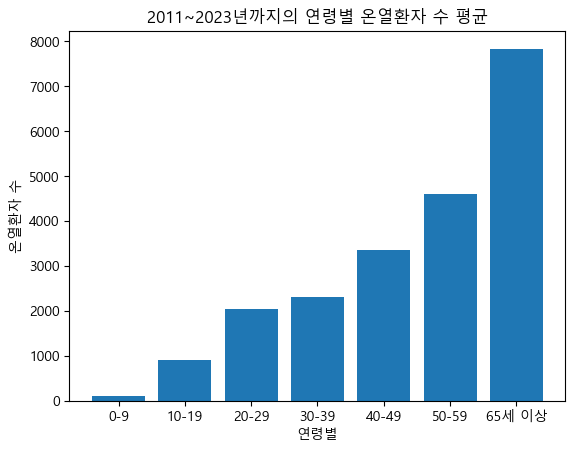

In [ ]:
plt.bar(hot_df1['연령별'],hot_df1['온열환자 수'])
plt.xlabel('연령별')
plt.ylabel('온열환자 수')
plt.title('2011~2023년까지의 연령별 온열환자 수 평균')


In [ ]:
aging=pd.read_csv('./data/주요 인구 지표.csv',encoding='cp949')

C:\Users\User\AppData\Local\Temp\ipykernel_17328\1691083667.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df['Year'][i], df['Senior Percentage'][i] + 0.5, f'{df["Senior Percentage"][i]:.2f}%', ha='center')


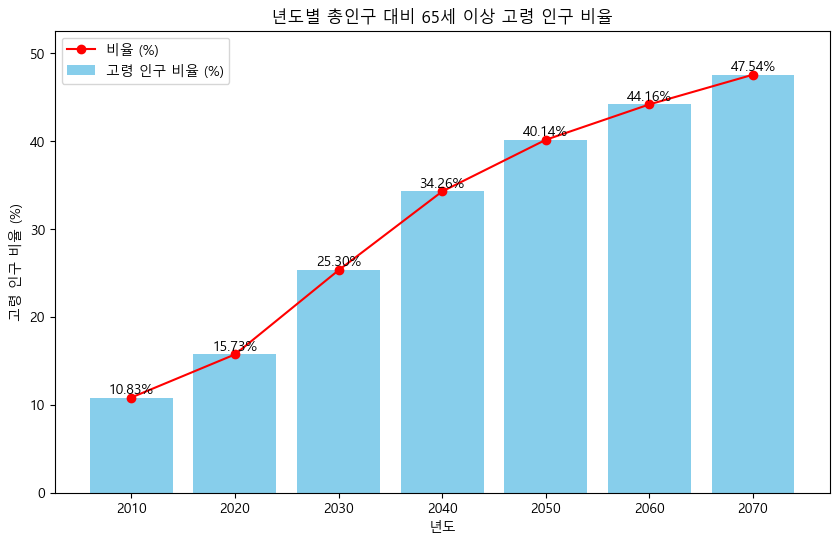

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './data/주요 인구 지표.csv'
data = pd.read_csv(file_path, encoding='cp949')

total_population = data[data['인구구조,부양비별'].str.contains('총인구')].reset_index(drop=True)
senior_population = data[data['인구구조,부양비별'].str.contains('65세 이상')].reset_index(drop=True)

years = ['2010', '2020', '2030', '2040', '2050', '2060', '2070']

total_population_values = total_population.iloc[0][years].astype(int)
senior_population_values = senior_population[senior_population['인구구조,부양비별'].str.contains('65세 이상')].iloc[0][years].astype(int)

senior_percentage = (senior_population_values / total_population_values) * 100

df = pd.DataFrame({
    'Year': years,
    'Senior Percentage': senior_percentage
})

plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['Senior Percentage'], color='skyblue', label='고령 인구 비율 (%)')
plt.plot(df['Year'], df['Senior Percentage'], color='red', marker='o', label='비율 (%)')

for i in range(len(df)):
    plt.text(df['Year'][i], df['Senior Percentage'][i] + 0.5, f'{df["Senior Percentage"][i]:.2f}%', ha='center')

plt.xlabel('년도')
plt.ylabel('고령 인구 비율 (%)')
plt.title('년도별 총인구 대비 65세 이상 고령 인구 비율')
plt.ylim(0, max(senior_percentage) + 5)
plt.legend()
plt.show()